## Uso de dados para otimizar a alocação de recursos destinados ao saneamento básico de Goiás

### ADENILSON SILVA

Para controle do fluxo de atividades do projeto, a consultoria utilizou o trello. O painel criado está disponível em:

# TRANSFORMAÇÃO DOS DADOS

A seguir, é apresentado o código utilizado pela consultoria para o tratamento dos dados do projeto.

####  1 - Importando bibliotecas

In [1]:
import pandas as pd  # Usada para trabalhar com dados em formato de tabela (DataFrame)
import os  # Usada para lidar com operações do sistema de arquivos
import matplotlib.pyplot as plt # Usada para criar e personalizar gráficos

#### 2 -  Obtendo todos os dados brutos


In [2]:
# Gerando o Dataframe com a série histórica da coleta e tratamento de esgotos dos municipios de Goiás
df_municipios_saneamento = pd.read_csv('dados_GO/A - dado_bruto/df_municipios_saneamento.csv', 
                                       delimiter = ';',
                                       encoding = 'utf-8',
                                       index_col= False)

# Visualizando os primeiros 5 registros do Dataframe "df_municipios_saneamento"
df_municipios_saneamento.head()

,Unnamed: 0,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,ES005 - Volume de esgotos coletado,ES006 - Volume de esgotos tratado
0,1,520005,Abadia de Goiás,GO,2022,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,125.40,125.40
1,2,520005,Abadia de Goiás,GO,2021,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,120.64,120.64
2,3,520005,Abadia de Goiás,GO,2020,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,116.50,116.50
3,4,520005,Abadia de Goiás,GO,2019,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,109.75,109.75
4,5,520005,Abadia de Goiás,GO,2018,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,104.43,104.43


In [3]:
# Visualizando quantidade de linhas e colunas do Dataframe "df_municipios_saneamento"
df_municipios_saneamento.shape

(1557, 13)

In [4]:
# Visualizando as informações sobre o Dataframe "df_municipios_saneamento"
df_municipios_saneamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1557 non-null   int64  
 1   Código do Município                 1557 non-null   int64  
 2   Município                           1557 non-null   object 
 3   Estado                              1557 non-null   object 
 4   Ano de Referência                   1557 non-null   int64  
 5   Código do Prestador                 1557 non-null   int64  
 6   Prestador                           1557 non-null   object 
 7   Sigla do Prestador                  1557 non-null   object 
 8   Abrangência                         1557 non-null   object 
 9   Tipo de serviço                     1557 non-null   object 
 10  Natureza jurídica                   1557 non-null   object 
 11  ES005 - Volume de esgotos coletado  1472 no

In [5]:
# Verificando quantidade de campos nulos
df_municipios_saneamento.isnull().sum()

Unnamed: 0                             0
Código do Município                    0
Município                              0
Estado                                 0
Ano de Referência                      0
Código do Prestador                    0
Prestador                              0
Sigla do Prestador                     0
Abrangência                            0
Tipo de serviço                        0
Natureza jurídica                      0
ES005 - Volume de esgotos coletado    85
ES006 - Volume de esgotos tratado     97
dtype: int64

In [25]:
# Visualizando a quantidade de registros duplicados no Dataframe "df_municipios_saneamento"
quantidade_duplicadas_mun = df_municipios_saneamento[['Município', 'Ano de Referência']].duplicated().sum()
print(f'Quantidade de registros duplicados: {quantidade_duplicadas_mun}')

Quantidade de registros duplicados: 0


In [7]:
mask =  df_municipios_saneamento[['Município', 'Ano de Referência']].duplicated(keep=False)
df_municipios_saneamento[mask]

,Unnamed: 0,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,ES005 - Volume de esgotos coletado,ES006 - Volume de esgotos tratado
263,264,520390,Buriti Alegre,GO,2022,52087000,Saneamento de Goiás S/A,SANEAGO,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,19.62,0.0
264,265,520390,Buriti Alegre,GO,2022,52039011,BURITI ALEGRE AMBIENTAL SPE -S/A,BAA,Local,Água e Esgoto,Empresa privada,59.07,0.0


Observação: Durante a fase de processamento e tratamento dos dados do primeiro conjunto, a consultoria identificou que o Município de Buriti Alegre (520390) apresentava duas leituras distintas para o ano de 2022. Essa discrepância foi comunicada à Secretaria Estadual de Meio Ambiente, que, por sua vez, enviou um ofício à prefeitura solicitando esclarecimentos. Em resposta, a prefeitura explicou que não se tratava de um erro, mas que, naquele ano, duas empresas operaram no município — uma no primeiro semestre e a outra no segundo. Após esse esclarecimento, a consultoria decidiu manter ambos os registros, pois isso não comprometeria os objetivos do projeto.

In [8]:
# Gerando o Dataframe com a listagem geral dos municípios de Goiás
df_municipios_listagem = pd.read_csv('dados_GO/A - dado_bruto/df_municipios_listagem.csv', 
                                       delimiter = ';',
                                       encoding = 'utf-8',
                                       index_col= False)

# Visualizando os primeiros 5 registros do Dataframe "df_municipios_listagem"
df_municipios_listagem.head()

,Municípios de Goiás,Códigos
0,Abadia de Goiás,5200050
1,Abadiânia,5200100
2,Acreúna,5200134
3,Adelândia,5200159
4,Água Fria de Goiás,5200175


In [9]:
# Visualizando quantidade de linhas e colunas do Dataframe "df_municipios_listagem"
df_municipios_listagem.shape

(246, 2)

In [10]:
# Visualizando as informações sobre o Dataframe "df_municipios_listagem"
df_municipios_listagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Municípios de Goiás  246 non-null    object
 1   Códigos              246 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [11]:
# Visualizando a quantidade de registros duplicados no Dataframe "df_municipios_listagem"
quantidade_duplicadas = df_municipios_listagem.duplicated().sum()
print(f'Quantidade de registros duplicados: {quantidade_duplicadas}')

Quantidade de registros duplicados: 0


In [12]:
# Gerando o Dataframe com a série histórica do número de habitantes dos municipios de Goiás
df_municipios_habitantes = pd.read_csv('dados_GO/A - dado_bruto/municipios_habitantes_imb.csv', 
                                       delimiter = ';',
                                       encoding = 'utf-8',
                                       index_col= False)

# Visualizando os primeiros 5 registros do Dataframe "df_municipios_habitantes"
df_municipios_habitantes.head()

,MUNICÍPIO,1992,1993,1994,1995,1997,1998,1999,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Abadia de Goiás,-,-,-,-,3.457,3.553,3.647,5.230,5.415,...,7.567,7.733,7.895,8.053,8.207,8.583,8.773,8.958,9.158,19.141
1,Abadiânia,9.443,9.439,9.455,9.472,10.299,10.431,10.562,11.666,11.883,...,17.326,17.701,18.069,18.427,18.775,19.614,20.042,20.461,20.873,15.498
2,Acreúna,14.521,14.961,15.370,15.770,15.559,15.752,15.945,18.792,19.194,...,21.366,21.549,21.730,21.905,22.076,22.182,22.366,22.546,22.710,20.506
3,Adelândia,2.337,2.348,2.352,2.356,2.772,2.882,2.990,2.501,2.485,...,2.550,2.554,2.557,2.561,2.564,2.517,2.516,2.516,2.515,2.393
4,Água Fria de Goiás,3.989,3.996,4.006,4.015,3.679,3.601,3.524,4.527,4.573,...,5.395,5.451,5.507,5.560,5.613,5.676,5.735,5.793,5.843,5.546


In [13]:
# Visualizando quantidade de linhas e colunas do Dataframe "df_municipios_listagem"
df_municipios_habitantes.shape

(246, 28)

In [14]:
# Visualizando as informações sobre o Dataframe "df_municipios_habitantes"
df_municipios_habitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MUNICÍPIO  246 non-null    object
 1   1992       246 non-null    object
 2   1993       246 non-null    object
 3   1994       246 non-null    object
 4   1995       246 non-null    object
 5   1997       246 non-null    object
 6   1998       246 non-null    object
 7   1999       246 non-null    object
 8   2001       246 non-null    object
 9   2002       246 non-null    object
 10  2003       246 non-null    object
 11  2004       246 non-null    object
 12  2005       246 non-null    object
 13  2006       246 non-null    object
 14  2008       246 non-null    object
 15  2009       246 non-null    object
 16  2011       246 non-null    object
 17  2012       246 non-null    object
 18  2013       246 non-null    object
 19  2014       246 non-null    object
 20  2015       246 non-null    objec

In [15]:
# Visualizando a quantidade de registros duplicados no Dataframe "df_municipios_habitantes"
quantidade_duplicadas = df_municipios_habitantes.duplicated().sum()
print(f'Quantidade de registros duplicados: {quantidade_duplicadas}')

Quantidade de registros duplicados: 0


#### 3 - Tratamento do DataFrame "df_municipios_saneamento"

Observação: Todos os valores nulos foram substituídos pelo valor 0. O valor 0 indica que naquele ano o munícipio não havia sido criado, ou que o munícipio não possuía sistema de coleta e/ou tratamento de esgotos

In [16]:
# Listando das colunas que serão mantidas no Dataframe "df_municipios_saneamento"
colunas_df_municipios_saneamento = ['Município',
                                   'Ano de Referência',
                                   'ES005 - Volume de esgotos coletado',
                                   'ES006 - Volume de esgotos tratado']

# Prescrevendo o Dataframe "df_municipios_saneamento" apenas com as colunas especificadas
df_municipios_saneamento = df_municipios_saneamento[colunas_df_municipios_saneamento]



# Criando dicionário que mapeia os nomes das colunas originais para os novos nomes
colunas_renomeadas_df_municipios_saneamento = {'ES005 - Volume de esgotos coletado' : \
                                                   'Volume de esgotos coletado - 1000 m³',
                                               'ES006 - Volume de esgotos tratado' : \
                                                   'Volume de esgotos tratado - 1000 m³'}



# Renomeando as colunas do DataFrame "df_municipios_saneamento" com base no dicionário
df_municipios_saneamento = \
    df_municipios_saneamento.rename(columns=colunas_renomeadas_df_municipios_saneamento)



# Preenchendo todos os valores nulos (NaN) no DataFrame "df_municipios_saneamento" com o valor 0.
df_municipios_saneamento = df_municipios_saneamento.fillna(0)



# Listando as colunas que serão convertidas para o tipo de dado float
#colunas_float_df_municipios_saneamento =  ['Volume de esgotos coletado - 1000 m³',
 #                                          'Volume de esgotos tratado - 1000 m³']


In [18]:
# Agrupando e somando o registro duplicado
df_municipios_saneamento = df_municipios_saneamento.groupby(['Município', 'Ano de Referência']).sum().reset_index()

In [19]:
# Visualizando os primeiros 5 registros do Dataframe "df_municipios_saneamento"
df_municipios_saneamento.head()

,Município,Ano de Referência,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,Abadia de Goiás,2006,7.25,7.25
1,Abadia de Goiás,2007,29.52,29.52
2,Abadia de Goiás,2008,27.76,27.76
3,Abadia de Goiás,2009,50.44,50.44
4,Abadia de Goiás,2010,75.79,75.79


In [20]:
# Obtendo informações sobre as colunas e dados do Dataframe "df_municipios_saneamento"
df_municipios_saneamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Município                             1556 non-null   object 
 1   Ano de Referência                     1556 non-null   int64  
 2   Volume de esgotos coletado - 1000 m³  1556 non-null   float64
 3   Volume de esgotos tratado - 1000 m³   1556 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 48.8+ KB


#### 4 - Tratamento do DataFrame "df_municipios_habitantes"

Observação: Ao tentar converter a coluna 'População Total' para int, ocorreu um erro por alguns registros estavam preenchidos como traço (-), para corrigir o problema eles foram substituídos pelo valor 0. O valor 0 indica que naquele ano o munícipio não havia sido criado.

In [21]:
# Substituir '-' por 0 em todo o DataFrame
df_municipios_habitantes = df_municipios_habitantes.replace('-', 0)



# Usando a função melt para transformar o DataFrame
df_municipios_habitantes = df_municipios_habitantes.melt(id_vars='MUNICÍPIO', 
                                                         var_name='Ano', 
                                                         value_name='Value')



# Renomeando as colunas
df_municipios_habitantes.columns = ['Município', 'Ano', 'População Total']



# Removendo os pontos (.) da coluna "População Total (Fonte: IMB)"
df_municipios_habitantes['População Total'] = \
   df_municipios_habitantes['População Total'].\
        apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)

                                                                                                                          
                                                                                                                          
# Convertendo a coluna "População Total" para o formato int
df_municipios_habitantes['População Total'] = df_municipios_habitantes['População Total'].astype(int)
df_municipios_habitantes['Ano'] = df_municipios_habitantes['Ano'].astype(int)

In [22]:
df_municipios_habitantes.head()

,Município,Ano,População Total
0,Abadia de Goiás,1992,0
1,Abadiânia,1992,9443
2,Acreúna,1992,14521
3,Adelândia,1992,2337
4,Água Fria de Goiás,1992,3989


In [23]:
df_municipios_habitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6642 entries, 0 to 6641
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Município        6642 non-null   object
 1   Ano              6642 non-null   int32 
 2   População Total  6642 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 103.9+ KB


In [24]:
# Configurando para não usar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Exibindo a descrição do DataFrame
df_municipios_habitantes.describe()

,Ano,População Total
count,6642.00,6642.00
mean,2007.56,23457.42
std,9.22,90365.48
min,1992.00,0.00
25%,1999.00,3498.00
50%,2008.00,6373.00
75%,2016.00,15490.75
max,2022.00,1555626.00


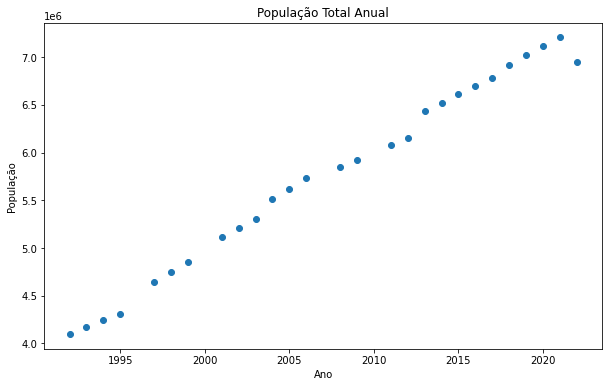

In [55]:
# Agrupando o DataFrame por Ano e obtendo a soma da População total anual do estado de Goiás
df = pd.DataFrame(df_municipios_habitantes.groupby('Ano')['População Total'].\
                  sum()).reset_index()

# Criar um gráfico de linha
plt.figure(figsize=(10, 6))
plt.scatter(df['Ano'], df['População Total'])

# Personalize o gráfico
plt.title('População Total Anual')
plt.xlabel('Ano')
plt.ylabel('População')

# Exiba o gráfico
plt.show()

Observação: O gráfico apresenta comportamento linear.

Observação: Tendo em vista a ausência de dados populacionais para os anos de 1996, 2000, 2007 e 2010 na base de dados, foi adotada uma abordagem de interpolação linear para estimar esses valores. Essa metodologia envolveu o cálculo da média entre os anos imediatamente anteriores e posteriores aos anos em que os dados estavam ausentes. Por exemplo, para estimar a população em 1996, foi calculada a média entre a população em 1995 e a população em 1997. Isso permitiu inferir população para esses anos intermediários com base em uma projeção linear a partir dos dados disponíveis.

In [56]:
df_municipios_habitantes['Possui dado interpolado?'] = 'Não'
df_municipios_habitantes.head()

,Município,Ano,População Total,Possui dado interpolado?
0,Abadia de Goiás,1992,0,Não
1,Abadiânia,1992,9443,Não
2,Acreúna,1992,14521,Não
3,Adelândia,1992,2337,Não
4,Água Fria de Goiás,1992,3989,Não


In [57]:
# Descrevendo os anos que haverá a estimação da população por meio de interpolação
anos_faltantes = [1996, 2000, 2007, 2010]



# Criando um DataFrame para armazenar as estimativas para cada ano e município
estimativas = []



# Iterarando sobre os municípios únicos no DataFrame
municipios_unicos = df_municipios_habitantes['Município'].unique()
for municipio in municipios_unicos:
    for ano_faltante in anos_faltantes:
        # Filtrando os dados para o município atual
        df_municipio = df_municipios_habitantes[df_municipios_habitantes['Município'] == municipio]
        
        # Verificando se os anos adjacentes estão disponíveis para interpolação
        if (ano_faltante - 1) in df_municipio['Ano'].\
            values and (ano_faltante + 1) in df_municipio['Ano'].values:
            # Filtrar os anos adjacentes
            anos_adjacentes = \
                df_municipio[(df_municipio['Ano'] == ano_faltante - 1) |\
                             (df_municipio['Ano'] == ano_faltante + 1)]
            
            # Calculculando a interpolação linear
            populacao_ano_anterior = \
                anos_adjacentes[anos_adjacentes['Ano'] == ano_faltante - 1]['População Total'].\
                    values[0]
            populacao_ano_posterior = \
                anos_adjacentes[anos_adjacentes['Ano'] == ano_faltante + 1]['População Total'].\
                    values[0]
            
            populacao_estimada = (populacao_ano_anterior + populacao_ano_posterior) / 2 
        else:
            # Se não houver dados para interpolação, será usado o valor 0
            populacao_estimada = 0
        
        # Armazenando a estimativa para o município e ano atual
        estimativas.append({'Município': municipio, 'Ano': ano_faltante, 'População Total': \
                            populacao_estimada})

        

# Criando um DataFrame com as estimativas
df_estimativas = pd.DataFrame(estimativas)



# Concatenando a estimativas (dados interpolados) com o DataFrame "df_municipios_habitantes"
df_municipios_habitantes = pd.concat([df_municipios_habitantes, df_estimativas], ignore_index=True)



# Convertendo a coluna "População Total" para o formato int
df_municipios_habitantes['População Total'] = df_municipios_habitantes['População Total'].astype(int)
df_municipios_habitantes['Ano'] = df_municipios_habitantes['Ano'].astype(int)



df_municipios_habitantes.head()

,Município,Ano,População Total,Possui dado interpolado?
0,Abadia de Goiás,1992,0,Não
1,Abadiânia,1992,9443,Não
2,Acreúna,1992,14521,Não
3,Adelândia,1992,2337,Não
4,Água Fria de Goiás,1992,3989,Não


In [65]:
df_municipios_habitantes.loc[
    df_municipios_habitantes['Possui dado interpolado?'] != 'Não', 
    'Possui dado interpolado?'
] = 'Sim'

In [66]:
df_municipios_habitantes['Possui dado interpolado?'].unique()

array(['Não', 'Sim'], dtype=object)

In [67]:
df_municipios_habitantes.shape

(7626, 4)

In [68]:
df_municipios_habitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Município                 7626 non-null   object
 1   Ano                       7626 non-null   int32 
 2   População Total           7626 non-null   int32 
 3   Possui dado interpolado?  7626 non-null   object
dtypes: int32(2), object(2)
memory usage: 178.9+ KB


In [69]:
quantidade_duplicadas = df_municipios_habitantes.duplicated().sum()
print(f'Quantidade de registros duplicados: {quantidade_duplicadas}')

Quantidade de registros duplicados: 0


#### 5 - Junção dos DataFrames: "df_municipios_habitantes", "df_municipios_saneamento" e "df_juncao_municipios_habitantes_saneamento"

In [70]:
# Juntando os DataFrames "df_municipios_habitantes" e "df_municipios_saneamento"
df_juncao_municipios_habitantes_saneamento = pd.merge(df_municipios_habitantes, 
                                                      df_municipios_saneamento, 
                                                      left_on=['Município', 'Ano'], 
                                                      right_on=['Município', 'Ano de Referência'], 
                                                      how='left')
# Foi verificada a necessidade de correção do nome do Município "São Luís de Montes Belos" 
df_juncao_municipios_habitantes_saneamento['Município'] = df_juncao_municipios_habitantes_saneamento['Município'].replace( 
   "São Luis de Montes Belos", "São Luís de Montes Belos" 
) 


# Juntando os DataFrames "df_juncao_municipios_habitantes_saneamento" e "df_municipios_listagem"
df_juncao_municipios_habitantes_saneamento_codigo = \
    pd.merge(df_juncao_municipios_habitantes_saneamento, 
             df_municipios_listagem, 
            left_on=['Município'], 
            right_on=['Municípios de Goiás'], 
            how='left')

#### 6 - Criação das colunas: "Volume de esgoto produzido - 1000 m³" e "População Total Urbana" e Filtragem do DataFrame "df_juncao_municipios_habitantes_saneamento_codigo"

A partir dos dados obtidos da nova base de dados (“df_juncao_municipios_habitantes_saneamento_codigo”), foram criadas as colunas “Volume de esgoto produzido - 1000m³” e “População Total Urbana”. Tais colunas obedeceram aos seguintes critérios:
- População Total Urbana: Para estimar a população urbana, foi utilizado como referência o Censo Demográfico realizado em 2010 pelo IBGE, de acordo com aquele censo a população residente urbano do estado de Goiás representava o valor médio de 90,29% da população total do estado, ou seja, um fator de 0,9029 (GOIÁS, 2011).
- Volume de esgoto produzido - 1000m³: Para estimar a quantidade de esgoto produzida em cada município do estado de Goiás, foi seguida as diretrizes estabelecidas pela norma da Associação Brasileira de Normas Técnicas (ABNT) NBR 7229/1993. Esta norma tem como um de seus objetivos definir a contribuição de esgoto por pessoa para o planejamento, construção e operação de sistemas de tanques sépticos. Neste projeto, utilizou-se um valor de referência de 130 litros de esgoto por pessoa. Considerando que os dados do DataFrame estão expressos em milhares de metros cúbicos (1000³) por ano, calcula-se a quantidade de es-goto produzida multiplicando o número de habitantes (população urbana) pelo seguinte fator:

$$
\text{fator_esgoto_produzido} = \frac{130 \, \text{litros por pessoa} \times 365 \, \text{dias}}{1000000}
$$


Esse fator permite estimar a produção de esgoto com base na população anual de cada município.

In [71]:
# Fator utilizado para calcular o esgoto produzido em cada munícipio
fator_esgoto_produzido = 130 * 365 / 1000 / 1000

# Fator utilizado para calcular a população urbana de cada munícipio
fator_populacao_urbana = 0.9029

# Gerando a coluna "População Total Urbana³"
df_juncao_municipios_habitantes_saneamento_codigo['População Total Urbana'] = \
    (df_juncao_municipios_habitantes_saneamento_codigo['População Total'] * fator_populacao_urbana).\
        astype(int)

# Gerando a coluna "Volume de esgoto produzido - 1000 m³"
df_juncao_municipios_habitantes_saneamento_codigo['Volume de esgoto produzido - 1000 m³'] = \
    (df_juncao_municipios_habitantes_saneamento_codigo['População Total Urbana'] *\
     fator_esgoto_produzido).round(2)


# Filtrando e renomeando as colunas
colunas_mantidas = ['Códigos',
                    'Município',
                    'Ano',
                    'População Total Urbana',
                    'Volume de esgoto produzido - 1000 m³',
                    'Volume de esgotos coletado - 1000 m³',
                    'Volume de esgotos tratado - 1000 m³',
                    'Possui dado interpolado?']

colunas_renomeadas = {'Códigos' : 'Código do Município (IBGE)'}

df_municipios_habitantes_saneamento_codigo = \
    df_juncao_municipios_habitantes_saneamento_codigo[colunas_mantidas]
df_municipios_habitantes_saneamento_codigo = \
    df_municipios_habitantes_saneamento_codigo.rename(columns=colunas_renomeadas)


# Substituindo valores ausente por "0"
df_municipios_habitantes_saneamento_codigo = \
    df_municipios_habitantes_saneamento_codigo.fillna(0)

In [72]:
# Verificando se a pasta "dados_GO/dado_tratado" já existe
if not os.path.exists('dados_GO/B - dado_tratado'):
    # Se não existir, cria a pasta
    os.makedirs('dados_GO/B - dado_tratado')

#Salvando o arquivo CSV no diretório "dados_GO/dado_tratado" como dados relativos aos anos de 1992 a 2021
df_municipios_habitantes_saneamento_codigo = \
    df_municipios_habitantes_saneamento_codigo[df_municipios_habitantes_saneamento_codigo['Ano'] < 2022]

df_municipios_habitantes_saneamento_codigo.to_csv('dados_GO/B - dado_tratado/df_municipios_habitantes_saneamento_codigo.csv', 
                                                  index=False, sep=';')

### Dados sobre versão
- Python: 3.11.4
- pandas==1.3.4
- matplotlib==3.4.3